<a href="https://colab.research.google.com/github/subhadeep-123/Implementations-Of-Machine-Learning-Algorithms/blob/master/Xgboost/Xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Uploading the file
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [0]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv('Churn_Modelling.csv')

print(df.shape,'\n')

(10000, 14) 



In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
empty_balc = []
for i in df['Balance']:
  if i == 0:
    empty_balc.append(i)
  else:
    pass
print(len(empty_balc))

3617


In [0]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [12]:
df['Gender'].head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    0
8    1
9    1
Name: Gender, dtype: int64

In [13]:
male = 0
female = 0
for i in df['Gender']:
  if i == 0:
    female += 1
  else:
    male += 1
print("Man",male)
print("Woman",female)

Man 5457
Woman 4543


Text(0.5, 1.0, 'Number of Man and Woman Account Holder')

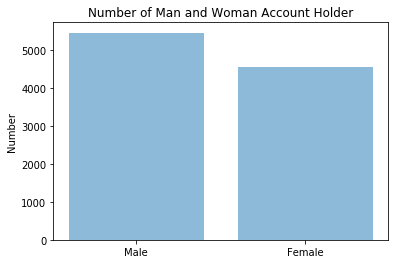

In [14]:
# Visualizing the results
objects = ['Male','Female']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[male, female],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Man and Woman Account Holder')

In [15]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
France = 0
Germany = 0 
Spain = 0

for i in df['Geography']:
  if i == 'France':
    France += 1
  elif i == 'Germany':
    Germany += 1
  else:
    Spain += 1
    
print("France: ",France)
print("Germany: ",Germany)
print("Spain: ",Spain)

France:  5014
Germany:  2509
Spain:  2477


Text(0.5, 1.0, 'Number Account Holder From the following three countries')

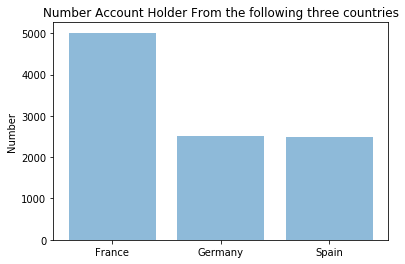

In [17]:
# Visualizing the results
objects = ['France','Germany', 'Spain']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[France, Germany, Spain],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number Account Holder From the following three countries')

In [19]:
df['Balance'].head(10)

0         0.00
1     83807.86
2    159660.80
3         0.00
4    125510.82
5    113755.78
6         0.00
7    115046.74
8    142051.07
9    134603.88
Name: Balance, dtype: float64

In [21]:
above_1lk = 0
below_1lk = 0
zero_balc = 0

for i in df['Balance']:
  if i >= 100000:
    above_1lk += 1
  elif i > 0 and i <= 100000:
    below_1lk += 1
  elif i == 0:
    zero_balc += 1
  else:
    pass
    
print("Above 1 lakh: ",above_1lk)
print("Below 1 lakh: ",below_1lk)
print("Zero Balance: ",zero_balc)

Above 1 lakh:  4799
Below 1 lakh:  1584
Zero Balance:  3617


Text(0.5, 1.0, 'Bank Blance')

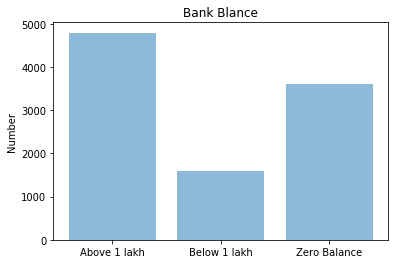

In [22]:
# Visualizing the results
objects = ['Above 1 lakh','Below 1 lakh', 'Zero Balance']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[above_1lk, below_1lk, zero_balc],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Bank Blance')

# Splitting into X and Y

In [0]:
X = df.iloc[:, 3:13].values
Y = df.iloc[:, 13].values

In [26]:
print("X: {}".format(X.shape))
print("Y: {}".format(Y.shape))

X: (10000, 10)
Y: (10000,)


## <h1>Encoding categorical data</h1>

In [28]:
#Creating instance of LabelEncoder class
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

#Creating instance of OneHotEncoder class
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [29]:
X

array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [30]:
print("X: {}".format(X.shape))

X: (10000, 11)


# Splitting the dataset into the Training set and Test set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.2,
                                                    random_state = 0)

# Building Our Classifier

In [32]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Predicting the results

In [0]:
y_pred = classifier.predict(X_test)

# Checking Model Performances

In [34]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1521,   74],
       [ 197,  208]])

In [36]:
#Accuracy Score
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy is :{}%".format(acc))

Accuracy is :86.45%


In [37]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.74      0.51      0.61       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.86      0.85      2000



In [42]:
# Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

print("Cross Val Score", accuracies)
print('\n',accuracies.mean())
print('\n',accuracies.std())

Cross Val Score [0.86891386 0.8576779  0.885      0.86625    0.85875    0.855
 0.86625    0.85       0.8485607  0.87359199]

 0.8629994451163204

 0.010677872171663988


# Saving Our Model and the Classifier

In [0]:
# Saving our classifier
with open('classifier.pickle','wb') as f:
    pickle.dump(classifier,f)